<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2016/17</h2>
<h2>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h2>
<h3>SIR epidemic models, epidemic processes on networks</h3>
<hr>
</center>

In [1]:
import networkx as nx
import numpy as np
from operator import itemgetter
from collections import defaultdict

import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Deterministic SIR

As a first step, we solve the differential equations of an SIR model with the Euler method. 

We set the parameters of the model

In [3]:
mu=0.2
R0=2.0
beta=R0*mu

In [4]:
beta

0.4

In [5]:
print "The average infectious period is ", 1./mu, " days"

The average infectious period is  5.0  days


The time step of integration is 1.

In [6]:
N=1000000
I=100
S=N-I
R=0
    
St=[]
It=[]
Rt=[]

St.append(S)
It.append(I)
Rt.append(R)

while I>0.001:
    deltaSI=beta*(float(I)*float(S)/N)
    deltaIR=mu*I
    
    S=S-deltaSI
    I=I+deltaSI-deltaIR
    R=R+deltaIR
    
    St.append(S)
    It.append(I)
    Rt.append(R)

In [7]:
print "The final attack rate is ", Rt[-1]/N

The final attack rate is  0.8084674424


We plot the time varying curves of S, I and R

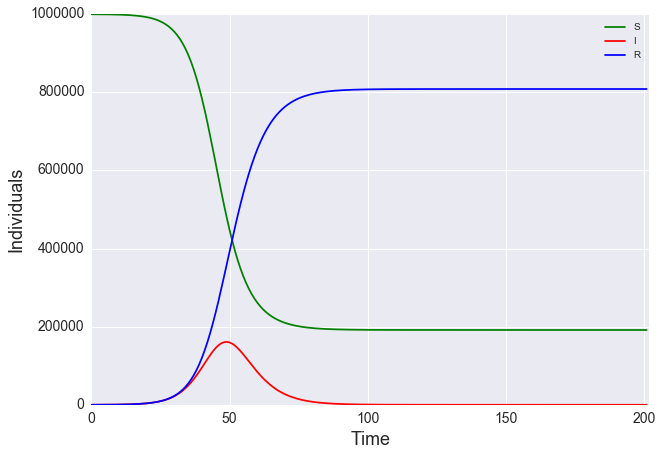

In [8]:
plt.figure(figsize=(10,7))
plt.plot(xrange(0, len(St)),np.array(St), label='S', color='g')
plt.plot(xrange(0, len(It)),np.array(It), label='I', color='r')
plt.plot(xrange(0, len(Rt)),np.array(Rt), label='R', color='b')

#plt.yscale('log')
plt.xlim([0,len(It)])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Individuals', fontsize=18)

plt.legend(loc='upper right')

# Stochastic SIR

We simulate a discrete and stochastic SIR model by randomly extracting the transition elements at each time step.
Since the simulations are stochastic, we need to run several realizations of the model and then extract their statistical averages.

We use the same model's parameters: $R_0=2.0$

In [9]:
dict_I=defaultdict(list) #here we store the number of I at each time step, for each run

In [10]:
final_R=[]

nrun=1000
Irun=[]
for r in xrange(0,nrun):

    #for each run r, we set the initial conditions  
    N=1000000
    I=100
    S=N-I
    R=0
    
    list_I=[]

    t=0
    dict_I[t].append(I)
    while I>0:
        
        p=beta*(float(I)/N)
        deltaSI=np.random.binomial(S,p)
        
        deltaIR=np.random.binomial(I,mu)
        
        S=S-deltaSI
        I=I+deltaSI-deltaIR
        R=R+deltaIR
        
        t+=1
        list_I.append(I)
        
        dict_I[t].append(I)
    
    final_R.append(float(R)/N)
    Irun.append(list_I)

print "The average final attack rate is ", np.average(np.array(final_R))

The average final attack rate is  0.808487084


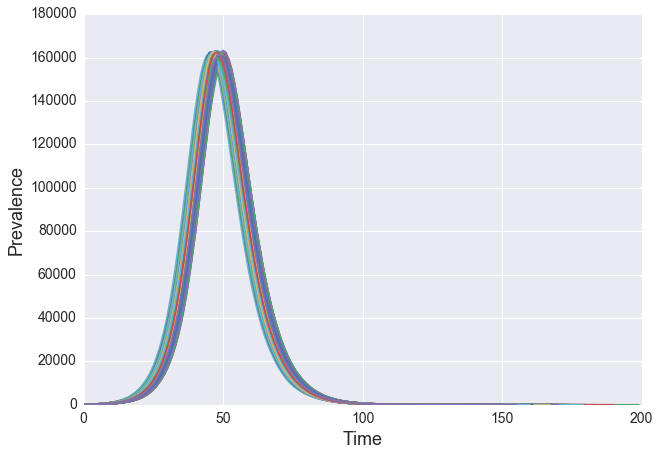

In [11]:
plt.figure(figsize=(10,7))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)

for r in Irun: 

    plt.plot(xrange(0,len(r)),r)
    

Too many lines are messy... let's draw a boxplot

In [13]:
import matplotlib.ticker as ticker

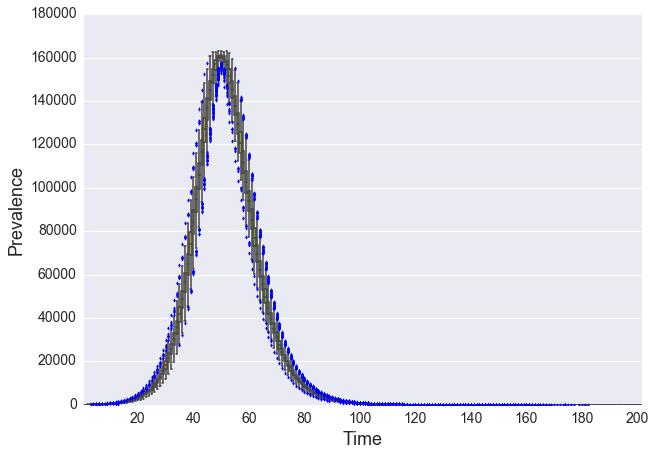

In [14]:
full_array=[np.array(dict_I[t]) for t in dict_I]

plt.figure(figsize=(10,7))

plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax=sns.boxplot(full_array)#this is kinda magic, isn't it?

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

Let's compare the result with the deterministic simulation by computing the average prevalence of the stochastic version.


In [15]:
full_average=[np.average(np.array(dict_I[t])) for t in dict_I]

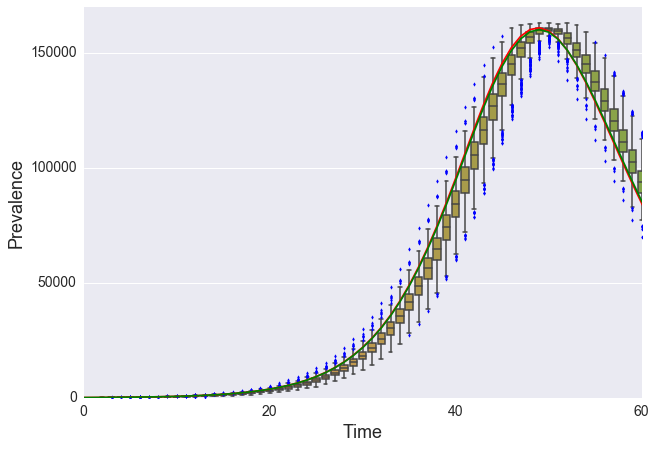

In [16]:
plt.figure(figsize=(10,7))

plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax=sns.boxplot(full_array)

plt.plot(xrange(0,len(It)),It,color='r') 
plt.plot(xrange(0,len(full_average)),full_average,color='g')

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.axis([0,60,-1,170000])
plt.show()

## Dependence on the initial conditions

The results of the stochastic version of the model depend on the initial conditions. 
Let's change the initial number of infected individuals to 1.

In [17]:
dict_I=defaultdict(list)#here we store the number of I at each time step, for each run

final_R=[]

nrun=1000
Irun=[]
for r in xrange(0,nrun):

    #for each run r, we set the initial conditions  
    N=1000000
    I=1  
    S=N-I
    R=0
    
    list_I=[]

    t=0
    dict_I[t].append(I)
    while I>0:
        
        p=beta*(float(I)/N)
        deltaSI=np.random.binomial(S,p)
        
        deltaIR=np.random.binomial(I,mu)
        
        S=S-deltaSI
        I=I+deltaSI-deltaIR
        R=R+deltaIR
        
        t+=1
        list_I.append(I)
        
        dict_I[t].append(I)
    
    final_R.append(float(R)/N)
    Irun.append(list_I)

print "The average final attack rate is ", np.average(np.array(final_R))

The average final attack rate is  0.46567707


#### With only 1 infected as a seed, we see more fluctuations, as expected.

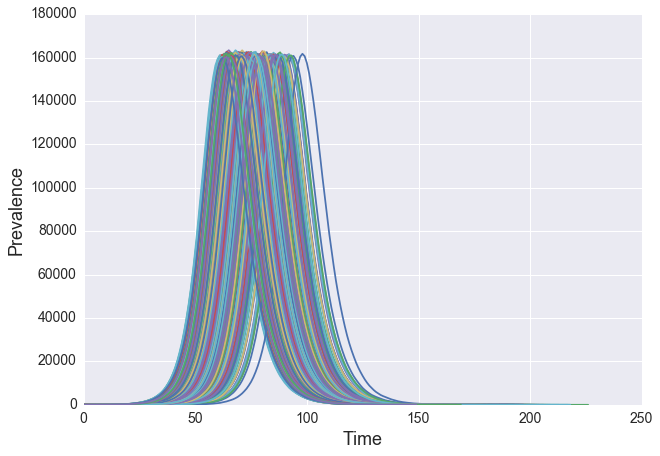

In [18]:
plt.figure(figsize=(10,7))
plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for r in Irun: 

    plt.plot(xrange(0,len(r)),r)
    

#### We have several runs without outbreak! 
The initial seed individual recovers before infecting someone else.

In [19]:
for r in final_R:
    if r<0.8:
        print r

2e-06
1e-06
1e-06
5e-06
1e-06
1e-06
3e-06
1e-06
1e-06
1e-06
2e-06
1e-06
2e-06
1e-06
1e-06
1e-06
1e-06
2e-06
1e-06
1e-06
3e-06
1e-06
2e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
7e-06
1e-06
1e-06
1e-06
1e-06
2e-06
3e-06
1e-06
6e-06
1e-06
1e-06
1e-06
1e-06
2e-06
3e-06
1e-06
9e-06
1e-06
1e-06
6e-06
1e-06
1e-06
9e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
2e-06
1e-06
1e-06
6e-06
2e-05
1e-06
8e-06
1e-06
1e-06
4e-06
3e-06
1e-06
1e-06
1e-06
1e-06
1e-06
7e-06
1.3e-05
1e-06
1e-06
1e-06
2e-06
1e-06
1e-06
1e-06
1e-06
5e-06
2e-06
1e-06
7e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
3e-06
1e-06
1e-06
1e-06
2e-06
1e-06
7e-06
1e-06
1e-06
2e-06
1e-06
2e-06
1e-06
2e-06
3e-06
2e-06
3e-06
1e-06
2e-06
4e-06
1e-06
1e-06
1e-06
1e-06
3e-06
1e-06
1e-06
1e-06
3e-06
1e-06
3e-06
5e-06
1e-06
2.2e-05
1e-06
1e-06
1e-06
2e-06
5e-06
5e-06
3e-06
2e-06
6e-06
1e-06
1e-06
3e-06
1e-06
3e-06
1e-06
1e-06
1e-06
1e-06
1e-06
2e-06
1e-06
3e-06
1e-06
4e-06
1e-06
1e-06
1e-06
1e-06
1e-06
4e-06
1e-06
7e-06


In [20]:
no_outbreak = [r for r in final_R if r<0.8]

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 7 Text yticklabel objects>)

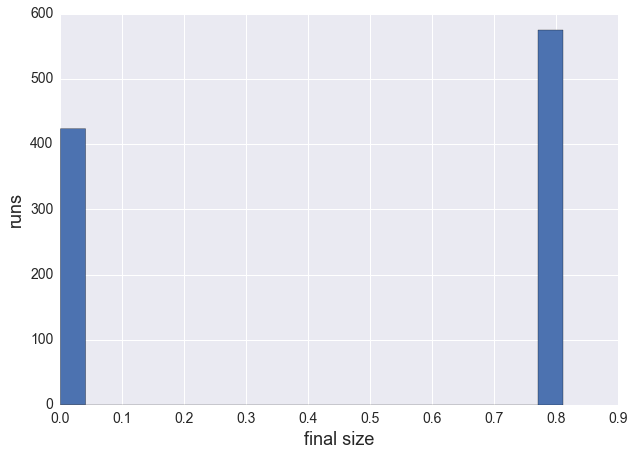

In [21]:
plt.figure(figsize=(10,7))
plt.hist(final_R, 20)
plt.xlabel('final size', fontsize=18)
plt.ylabel('runs', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [22]:
len(no_outbreak)

424

In a stochastic SIR model, the probability of an outbreak is equal to 
<center>
$p_{outb}=1-(\frac{1}{R_0})^{I_0}$
</center>

In [23]:
p_outbreak=1-1/R0

In [24]:
p_outbreak

0.5

Of course, such fluctuations do not affect the deterministic model, where the outcome is fixed. 

In [25]:
N=1000000
I=1
S=N-I
R=0
    

St=[]
It=[]
Rt=[]

St.append(S)
It.append(I)
Rt.append(R)

while I>0.5:
    deltaSI=beta*(float(I)*float(S)/N)
    deltaIR=mu*I
    
    S=S-deltaSI
    I=I+deltaSI-deltaIR
    R=R+deltaIR
    
    St.append(S)
    It.append(I)
    Rt.append(R)

In [26]:
print "The final attack rate is ", Rt[-1]/N

The final attack rate is  0.808430326634


# Stochastic SIR on networks

In [27]:
airport_path='./../network_data/USairport_2010.txt'
meta_path='./../network_data/USairport_2010_codes.txt'

In [28]:
G=nx.Graph()
fh=open(airport_path,'r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()  

In [29]:
G.code={}
G.name={}
G.pos={}

lons=[]
lats=[]

finfo=open(meta_path,'r')
for line in finfo.readlines():
    s=line.strip().split()
    node=int(s[0])
    
    lon=float(s[4])
    lat=float(s[3])
    
    G.code[node]=s[1]
    G.name[node]=s[2]
    G.pos[node]=[lon,lat]
    
    lons.append(lon)
    lats.append(lat)
finfo.close() 

In [30]:
#disease parameters
mu=0.2#infectious period
beta=0.01#probability of infection given a contact

In [31]:
#we need to store the disease status of each node
G.disease_status={} #S=0, I=1, R=-1

infected_nodes=[]#list of infected nodes

In [32]:
#let's choose a seed
node_list=[]

deg=G.degree()
for i in sorted(deg.iteritems(), key=itemgetter(1)):
    node_list.append(i[0])
seed=node_list[-1]

print "The seed is", G.name[seed]
print "The degree of the seed is", G.degree(seed)

The seed is Denver
The degree of the seed is 192


In [33]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n]=1
        #infected
    else:
        G.disease_status[n]=0
        #susceptible

In [34]:
I_net=[]
while len(infected_nodes)>0:
    
    #transmission
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j]==0:
                p=np.random.random()
                if p<beta:
                    G.disease_status[j]=1
                
    
    #recovery
    for k in infected_nodes:
        p=np.random.random()
        if p<mu:
            G.disease_status[k]=-1
    
    #update of disease status
    infected_nodes=[]
    for n in G.nodes():
        if G.disease_status[n]==1:
            infected_nodes.append(n)
 
    #store output
    I_net.append(len(infected_nodes))

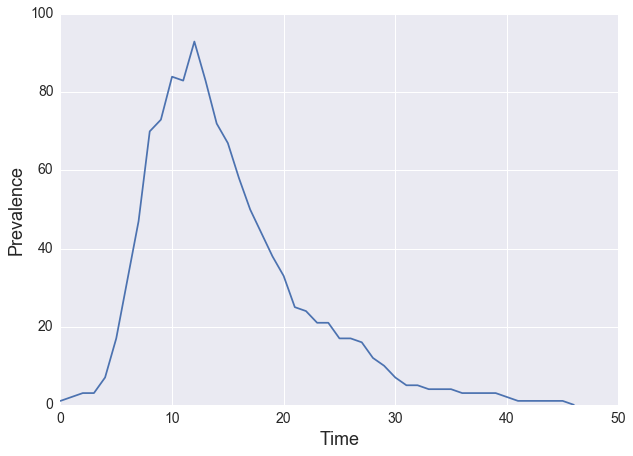

In [35]:
plt.figure(figsize=(10,7))

plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(xrange(0,len(I_net)),I_net)

In [36]:
recovered=0
for n in G.nodes():
    if G.disease_status[n]==-1:
        recovered+=1

print "The total number of infected nodes is", recovered
print "The final attack rate is", float(recovered)/len(G.nodes())
        

The total number of infected nodes is 218
The final attack rate is 0.538271604938


#### Visualize the infection spread on the network

In [37]:
from mpl_toolkits.basemap import Basemap

In [38]:
shape_path='./../shapefiles/st99_d00'

In [39]:
#we need to store the disease status of each node
G.disease_status={} #S=0, I=1, R=-1

infected_nodes=[]#list of infected nodes

In [40]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n]=1
        #infected
    else:
        G.disease_status[n]=0
        #susceptible

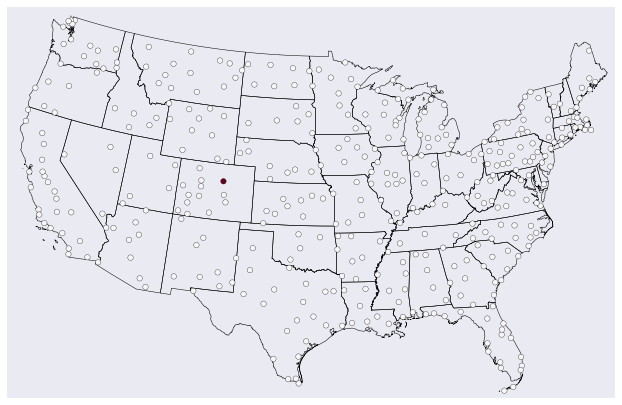

In [41]:
t=0
node_color=[G.disease_status[v] for v in G]#color code on disease status

plt.figure(figsize=(12,7))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95,suppress_ticks=True)

# convert lat and lon to map projection
mx,my=m(lons,lats)

#new dictionary for projected coordinates of nodes
G.pos_m={}
i=0
for n in G.pos:
    G.pos_m[n]=[mx[i], my[i]]
    i+=1
    

m.readshapefile(shape_path, name='states', drawbounds=True)

nx.draw_networkx_nodes(G, pos=G.pos_m, node_size=30,node_color=node_color, cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)

#plt.savefig('./spreading_SIR_snapshot_time_'+str(t)+'.png')

KeyboardInterrupt: 

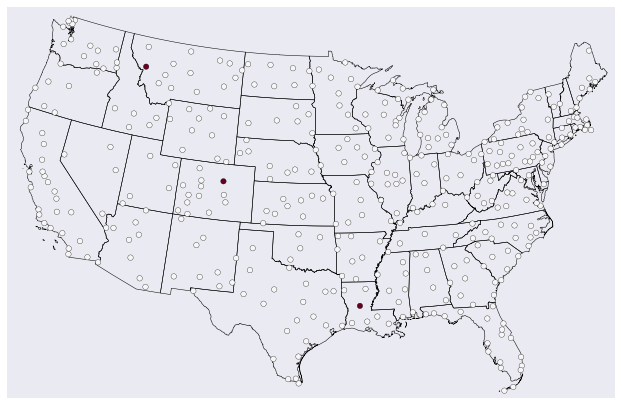

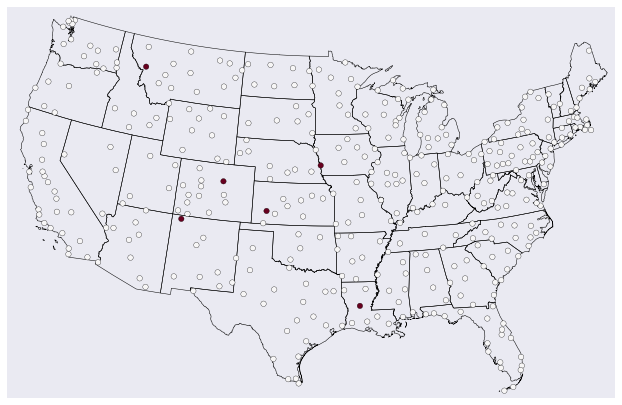

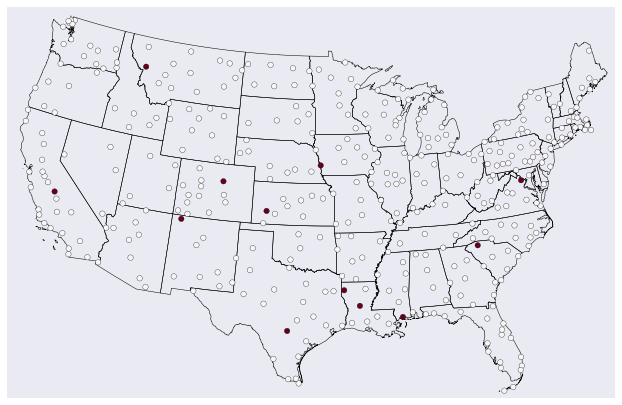

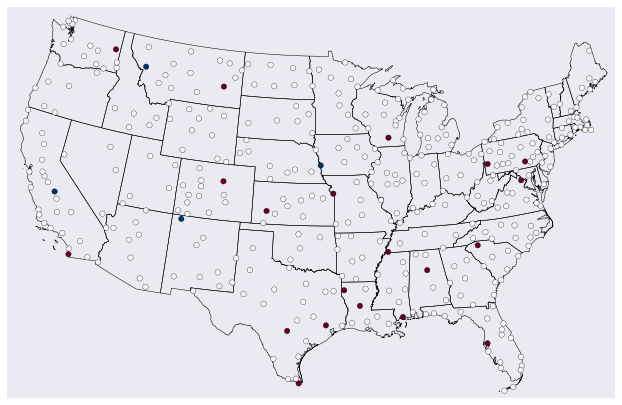

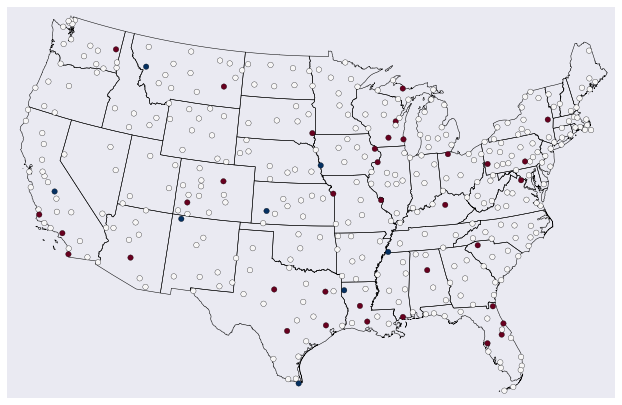

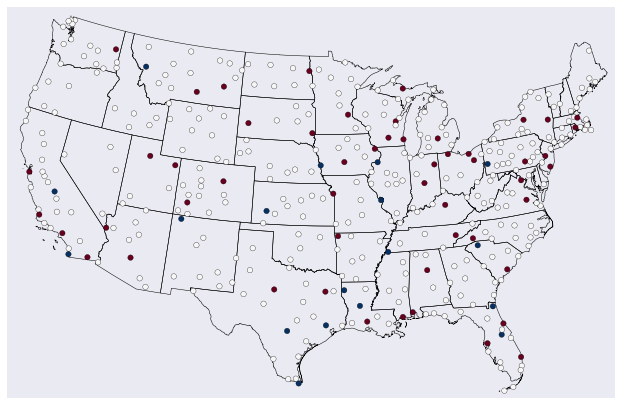

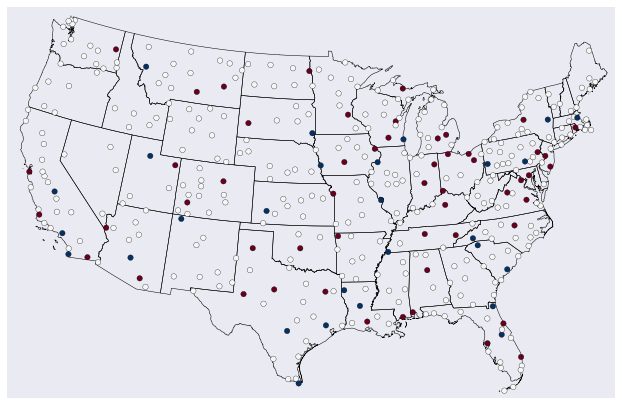

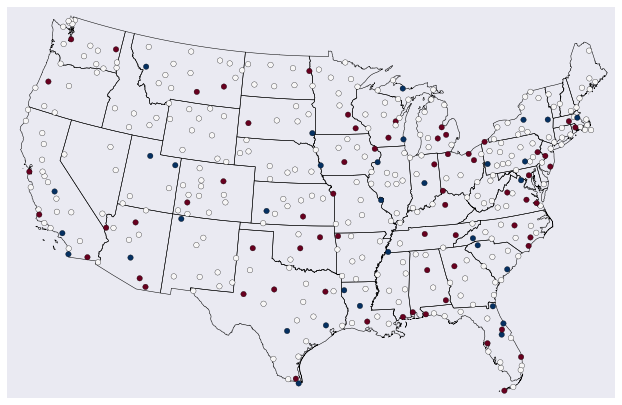

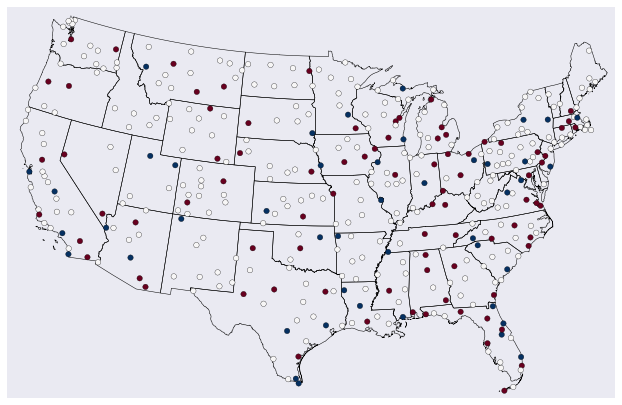

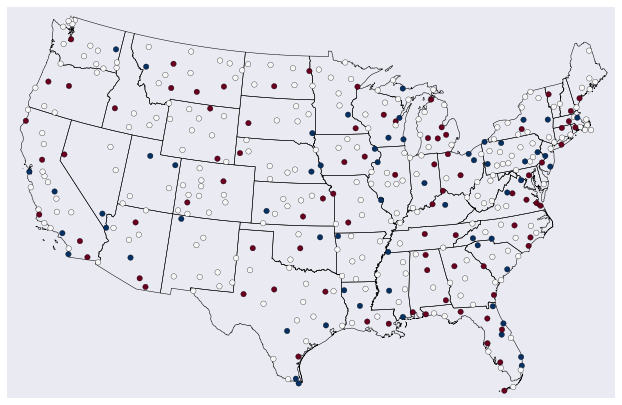

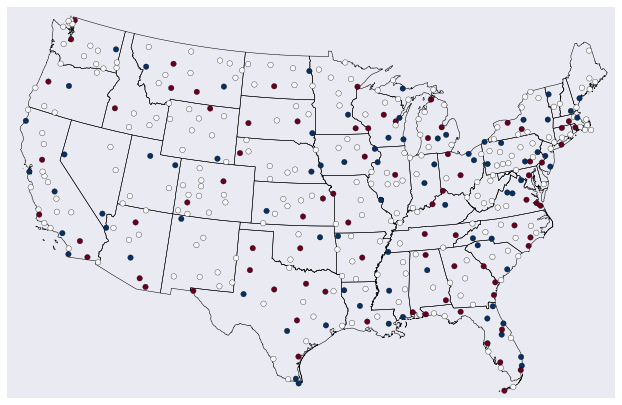

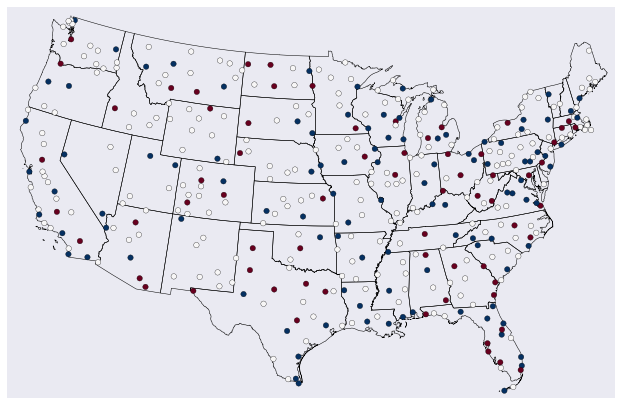

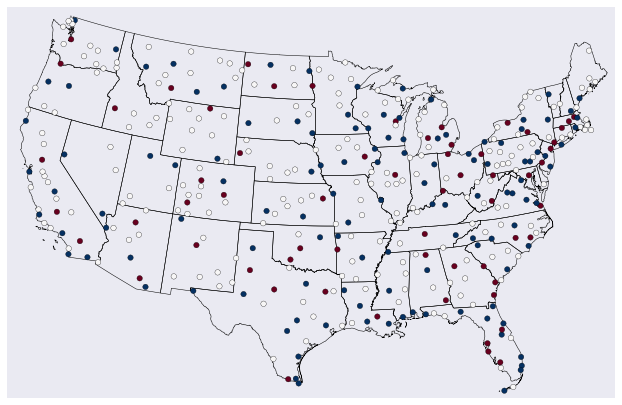

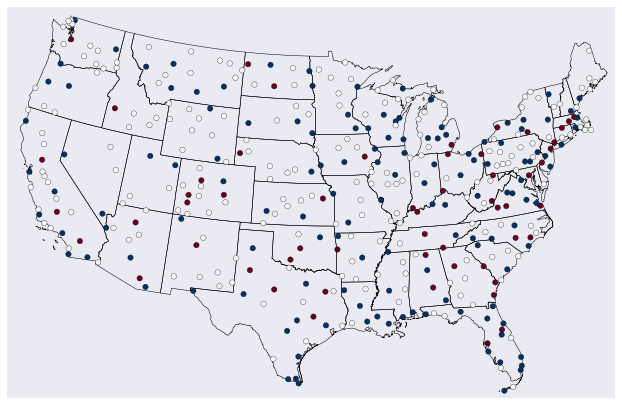

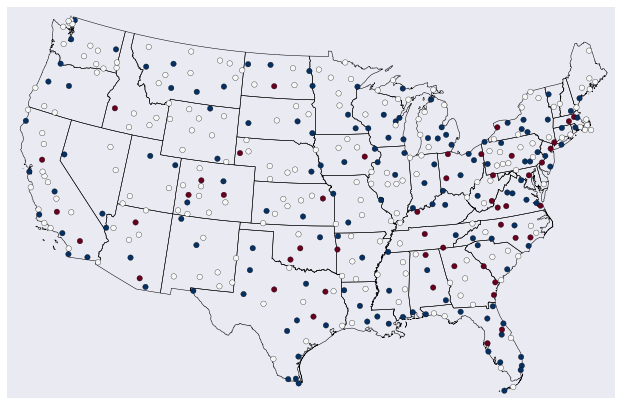

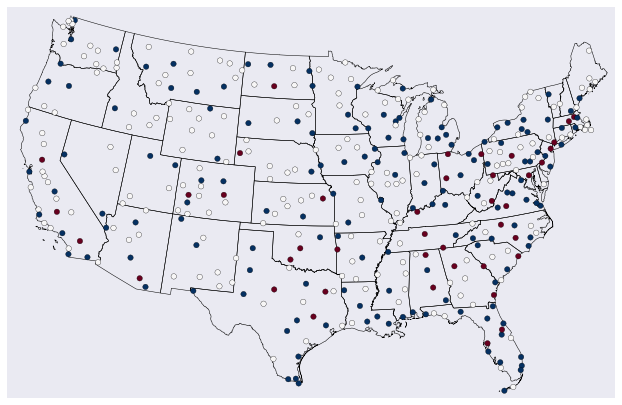

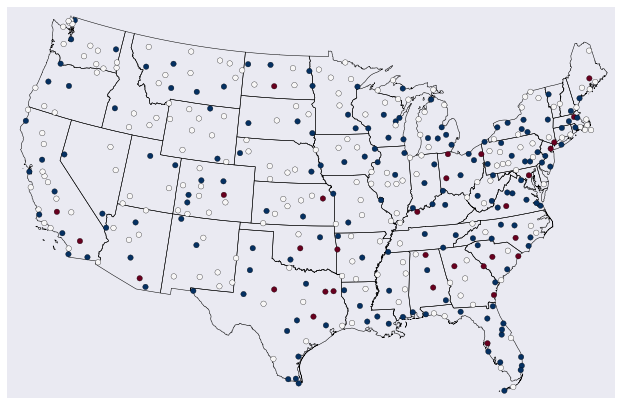

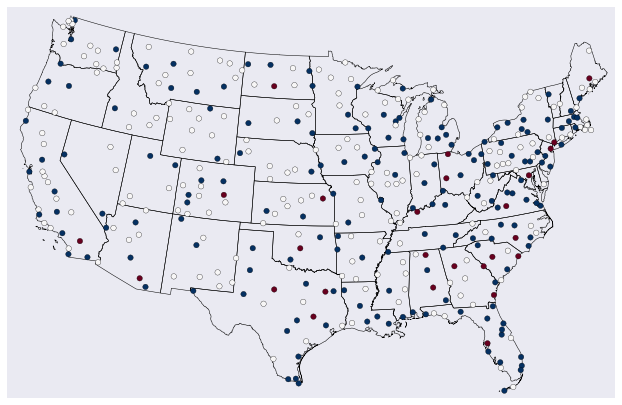

In [42]:
while len(infected_nodes)>0 and t<20:
    
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j]==0:
                p=np.random.random()
                if p<beta:
                    G.disease_status[j]=1
                
    for k in infected_nodes:
        p=np.random.random()
        if p<mu:
            G.disease_status[k]=-1
    
    infected_nodes=[]
    for n in G.nodes():
        if G.disease_status[n]==1:
            infected_nodes.append(n)

    t+=1
    node_color=[G.disease_status[v] for v in G]#color code on disease status
    
    plt.figure(figsize=(12,7))
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95,suppress_ticks=True)
    m.readshapefile(shape_path, name='states', drawbounds=True)

    
    nx.draw_networkx_nodes(G, pos=G.pos_m, node_size=30,node_color=node_color, 
                           cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
    
    #plt.savefig('./spreading_SIR_snapshot_time_'+str(t)+'.png')